In [ ]:
### 1- Import required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import glob
from scipy.spatial import distance
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#import xgboost as xgb

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = "E://Academics//BCB Diploma//MODA//Project//KIRC project//GDCdata//TCGA-KIRC//Transcriptome_Profiling//Gene_Expression_Quantification"

file_list=[]
for folder in os.listdir(path):
    #print(os.path.join(path, folder))
    for file in os.listdir(path+ "//"+folder):
        if file.endswith(".tsv"):
        # Prints only text file present in My Folder
            file_list.append(path+ "//"+folder+"//"+file)
file_list

In [ ]:
first_name= file_list[0].split('//')[-2]
#print(first_name)
first_f = pd.DataFrame(pd.read_csv(file_list[0], sep="\t", header=0, skiprows=[0,2,3,4,5], usecols=[0, 1, 2, 6]))
first_f.rename(columns={"tpm_unstranded": first_name}, inplace = True)
first_f.head()

In [ ]:
exp_counts= first_f  
for i in range(1,len(file_list)):
    f_name = file_list[i].split('//')[-2]
    next_f = pd.DataFrame(pd.read_csv(file_list[i], sep="\t", header=0, skiprows=[0,2,3,4,5], usecols=[6]))
    next_f.rename(columns={"tpm_unstranded": f_name}, inplace = True)
    exp_counts = pd.concat([exp_counts,next_f],axis=1)

exp_counts.head()

In [ ]:
exp_counts= exp_counts[exp_counts.gene_type=="protein_coding"]
exp_counts

In [ ]:
exp_counts2 = exp_counts.groupby('gene_name', as_index=True, sort=False)[exp_counts.columns[3:]].mean()
exp_counts2

In [ ]:
exp_counts2.to_csv('exp_counts_tpm_protcod_merged.csv')

In [2]:
exp_counts = pd.read_csv("exp_counts_tpm_protcod_merged.csv", index_col=0)
exp_counts.head()

,000d81dd-9ba4-4852-9090-2bf22f6483f0,00174492-1adc-4310-8147-a622befbb466,00252d7f-e222-462f-badc-b97e8dce2021,00ddbdd1-f29d-438b-820b-aacb111a3ec4,017de1fe-6f36-4324-a20a-9d9ee3439d8f,01851b83-f8c4-4108-99c9-248fe29e39e9,02669516-0c84-46b4-9ff1-ab147ff1ddcc,02c1c266-473f-437d-b768-20f685349ecb,02f13d48-a03a-42e8-917d-e5d9025e2898,03c6d5d2-1a33-4ae7-9421-f43b14fc97bd,...,fc63bae4-fdfb-4990-9902-3e0fb51ec092,fc9e3356-b4e0-46e8-9842-46a2366352de,fd3d7a82-a316-4df0-9d84-409cb12eb9b1,fd493a63-08fb-4076-8b3c-f443dc4bcb0b,feb6de8d-c44f-44ca-9583-232511ef54fd,ff07dd5a-7b2d-47ed-8a6b-400b3c5c8db4,ff21a21b-35fb-423c-896c-c6943dbce540,ff6cd0e8-98a0-4a96-9650-c348bcfe8901,ffe0d448-20d6-4952-9650-03531ef6fc79,fff384b3-f8cc-4754-9860-74863ff3cc23
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,50.3093,37.8239,138.9149,38.1085,27.4275,143.8692,24.6042,36.8433,40.4883,17.9924,...,50.5575,42.3770,23.6608,42.2725,56.2841,40.2582,25.9545,42.9272,26.3359,31.6082
TNMD,1.8636,0.3392,1.2867,0.6410,0.2703,1.8443,0.5066,3.1157,0.4031,0.8331,...,0.4566,3.0390,0.7052,26.0935,0.1942,0.6677,0.0877,0.2773,0.7459,0.0686
DPM1,85.7241,51.3701,77.2900,76.2203,84.7318,77.5274,57.3451,44.1594,65.6542,24.5446,...,88.4589,74.7226,76.4411,58.5320,157.9127,92.2171,81.0769,87.4014,74.7579,66.2066
SCYL3,9.2839,4.6496,3.8629,8.0788,5.4551,8.7751,3.4493,4.1625,6.2579,2.3614,...,4.3781,7.2294,6.0308,4.1398,6.1942,7.2686,6.7891,7.6856,6.2894,8.4483
C1orf112,3.2253,1.7095,1.7255,2.6212,4.1345,1.9379,1.0412,0.4699,1.7439,0.6758,...,1.6933,3.0655,2.1023,1.3899,3.6847,2.8743,2.4068,2.9137,2.4227,2.2465


In [3]:
## Read the labels dataset as pandas dataframe:
meta = pd.read_csv('kirc_g.tsv', sep="\t")
meta.head()

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type
0,5f2edb2e-9b7f-44d6-af6c-ff958631cf6a,26de8d84-baea-40ed-8187-aa61aa31b2fd.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-4781,TCGA-BP-4781-01A,Primary Tumor
1,39b522e7-162a-42e6-bdcc-a156016b9a81,f96a4c25-e675-451e-8c8e-9548d1355318.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-CJ-4644,TCGA-CJ-4644-01A,Primary Tumor
2,ff6cd0e8-98a0-4a96-9650-c348bcfe8901,bbdc627d-489d-4185-b32b-71207f241b62.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-CZ-5986,TCGA-CZ-5986-01A,Primary Tumor
3,c876a9c8-43b4-47ed-ba9d-727439ab8ef5,6749ec3d-aae3-4d53-b0d3-5732e48e720a.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-5176,TCGA-BP-5176-01A,Primary Tumor
4,4a63eb90-d580-40d0-9136-a7baf34d3627,0d480f67-4325-465f-8f1d-d315ac63f663.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-CZ-4863,TCGA-CZ-4863-01A,Primary Tumor


In [4]:
meta["Sample Type"].value_counts()

Sample Type
Primary Tumor               541
Solid Tissue Normal          72
Additional - New Primary      1
Name: count, dtype: int64

In [5]:
meta = meta[meta["Sample Type"]!="Additional - New Primary"]
meta["Sample Type"].value_counts()

Sample Type
Primary Tumor          541
Solid Tissue Normal     72
Name: count, dtype: int64

In [6]:
meta = meta.sort_values('File ID')

#meta.reset_index(inplace=True)
meta.reset_index(drop=True, inplace=True)

In [7]:
meta.head()

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type
0,000d81dd-9ba4-4852-9090-2bf22f6483f0,09755ce8-ed89-411a-a42f-b3edc4e41eeb.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-CJ-4639,TCGA-CJ-4639-01A,Primary Tumor
1,00174492-1adc-4310-8147-a622befbb466,84e40c7e-2f60-4461-b14c-0859697295a4.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-4964,TCGA-BP-4964-01A,Primary Tumor
2,00252d7f-e222-462f-badc-b97e8dce2021,5abd235a-829b-4457-8f47-ecd1adab30ca.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-CW-5591,TCGA-CW-5591-11A,Solid Tissue Normal
3,00ddbdd1-f29d-438b-820b-aacb111a3ec4,e635dbc7-ef8d-45e2-acd2-b961f0c8b600.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-A3-A8OW,TCGA-A3-A8OW-01A,Primary Tumor
4,017de1fe-6f36-4324-a20a-9d9ee3439d8f,1b366431-2a13-45a5-a21e-931d473de6d4.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-4983,TCGA-BP-4983-01A,Primary Tumor


In [8]:
exp_cts = exp_counts.T
exp_cts.head()

gene_name,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AL031178.2,AC119733.1,AC020765.6,AC010980.1,AC004233.4,AL451106.1,AC008763.4,AC006486.3,AL391628.1,AP006621.6
000d81dd-9ba4-4852-9090-2bf22f6483f0,50.3093,1.8636,85.7241,9.2839,3.2253,17.8309,25.0306,59.9089,21.7166,29.1489,...,0.0,0.0,0.0000,0.1426,0.0000,0.0,0.0,0.0,0.0550,0.5038
00174492-1adc-4310-8147-a622befbb466,37.8239,0.3392,51.3701,4.6496,1.7095,14.5073,29.0526,63.3354,13.0666,18.9981,...,0.0,0.0,0.0099,0.1687,0.0530,0.0,0.0,0.0,0.0360,0.3439
00252d7f-e222-462f-badc-b97e8dce2021,138.9149,1.2867,77.2900,3.8629,1.7255,17.9696,79.2434,44.6616,11.4259,15.1162,...,0.0,0.0,0.0000,0.2716,0.3166,0.0,0.0,0.0,0.0120,0.2740
00ddbdd1-f29d-438b-820b-aacb111a3ec4,38.1085,0.6410,76.2203,8.0788,2.6212,19.9282,20.6766,89.3928,17.7440,24.2165,...,0.0,0.0,0.0374,0.0245,0.0000,0.0,0.0,0.0,0.0681,0.3033
017de1fe-6f36-4324-a20a-9d9ee3439d8f,27.4275,0.2703,84.7318,5.4551,4.1345,43.9371,59.1496,68.9828,9.3445,24.1405,...,0.0,0.0,0.0384,0.1176,0.0000,0.0,0.0,0.0,0.0363,0.5936


In [9]:
exp_cts = exp_cts.loc[meta["File ID"]]
exp_cts.shape

(613, 19938)

In [10]:
sum(exp_cts.index == meta["File ID"])

613

In [11]:
#data_clinical_patient.txt
## Read the labels dataset as pandas dataframe:
cbio = pd.read_csv('data_clinical_patient.txt', sep="\t", header=0, skiprows=[0,1,2,3])
cbio.head()

,OTHER_PATIENT_ID,PATIENT_ID,FORM_COMPLETION_DATE,HISTOLOGICAL_DIAGNOSIS,GRADE,LATERALITY,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,RACE,...,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,STAGE_OTHER,TARGETED_MOLECULAR_THERAPY,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,2B1DEA0A-6D55-4FDD-9C1C-0D9FBE03BD78,TCGA-3Z-A93Z,2014-11-11,Kidney Clear Cell Renal Carcinoma,G2,Right,YES,NO,MALE,BLACK OR AFRICAN AMERICAN,...,YES,[Not Available],[Not Available],NO,3Z,Kidney,0:LIVING,12.65,0:DiseaseFree,12.65
1,D3B47E53-6F40-4FC8-B5A4-CBE548A770A9,TCGA-6D-AA2E,3/17/14,Kidney Clear Cell Renal Carcinoma,G2,Right,YES,NO,Female,BLACK OR AFRICAN AMERICAN,...,YES,[Not Available],[Not Available],NO,6D,Kidney,0:LIVING,11.89,0:DiseaseFree,11.89
2,9fb55e0b-43d8-40a3-8ef2-d198e6290551,TCGA-A3-3306,8/23/10,Kidney Clear Cell Renal Carcinoma,G3,Left,NO,YES,Male,WHITE,...,YES,[Not Available],[Not Available],[Not Available],A3,Kidney,0:LIVING,36.79,0:DiseaseFree,36.79
3,7ac1d6c6-9ade-49af-8794-10b5b96b2b05,TCGA-A3-3307,4/13/10,Kidney Clear Cell Renal Carcinoma,G3,Right,NO,YES,Male,[Not Available],...,YES,[Not Available],[Not Available],[Not Available],A3,Kidney,0:LIVING,47.17,0:DiseaseFree,47.17
4,3cbca837-f5a7-4a87-8f02-c59eac232d5a,TCGA-A3-3308,4/12/10,Kidney Clear Cell Renal Carcinoma,G2,Right,NO,YES,Female,WHITE,...,YES,[Not Available],[Not Available],[Not Available],A3,Kidney,0:LIVING,0.53,0:DiseaseFree,0.53


In [32]:
cbio.columns

Index(['OTHER_PATIENT_ID', 'PATIENT_ID', 'FORM_COMPLETION_DATE',
       'HISTOLOGICAL_DIAGNOSIS', 'GRADE', 'LATERALITY',
       'PROSPECTIVE_COLLECTION', 'RETROSPECTIVE_COLLECTION', 'SEX', 'RACE',
       'ETHNICITY', 'HISTORY_OTHER_MALIGNANCY', 'HISTORY_NEOADJUVANT_TRTYN',
       'INITIAL_PATHOLOGIC_DX_YEAR', 'LYMPH_NODES_EXAMINED',
       'LYMPH_NODE_EXAMINED_COUNT', 'LYMPH_NODES_EXAMINED_POSITIVE',
       'AJCC_STAGING_EDITION', 'AJCC_TUMOR_PATHOLOGIC_PT',
       'AJCC_NODES_PATHOLOGIC_PN', 'AJCC_METASTASIS_CLINICAL_CM',
       'AJCC_METASTASIS_PATHOLOGIC_PM', 'AJCC_PATHOLOGIC_TUMOR_STAGE',
       'TUMOR_STATUS', 'IDH_LEVEL', 'SERUM_CALCIUM_LEVEL', 'HEMOGLOBIN_LEVEL',
       'PLATELET_COUNT', 'WBC', 'ERYTHROCYTE_SEDIMENTATION_RATE',
       'TOBACCO_SMOKING_HISTORY_INDICATOR', 'SMOKING_YEAR_STARTED',
       'SMOKING_YEAR_STOPPED', 'SMOKING_PACK_YEARS',
       'KARNOFSKY_PERFORMANCE_SCORE', 'ECOG_SCORE',
       'PERFORMANCE_STATUS_TIMING', 'RADIATION_TREATMENT_ADJUVANT',
       'TREATM

In [12]:
cbio_pat = cbio["PATIENT_ID"]
meta_case = meta["Case ID"]

In [13]:
#meta["Case ID"].values

In [14]:
com_case = set(meta_case).intersection(set(cbio_pat))
len(com_case)

533

In [15]:
meta2 = meta.drop_duplicates(subset=["Case ID"])
meta2.shape

(533, 8)

In [16]:
meta2.set_index("Case ID", inplace=True)
meta2.head()

,File ID,File Name,Data Category,Data Type,Project ID,Sample ID,Sample Type
Case ID,,,,,,,
TCGA-CJ-4639,000d81dd-9ba4-4852-9090-2bf22f6483f0,09755ce8-ed89-411a-a42f-b3edc4e41eeb.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-CJ-4639-01A,Primary Tumor
TCGA-BP-4964,00174492-1adc-4310-8147-a622befbb466,84e40c7e-2f60-4461-b14c-0859697295a4.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-4964-01A,Primary Tumor
TCGA-CW-5591,00252d7f-e222-462f-badc-b97e8dce2021,5abd235a-829b-4457-8f47-ecd1adab30ca.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-CW-5591-11A,Solid Tissue Normal
TCGA-A3-A8OW,00ddbdd1-f29d-438b-820b-aacb111a3ec4,e635dbc7-ef8d-45e2-acd2-b961f0c8b600.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-A3-A8OW-01A,Primary Tumor
TCGA-BP-4983,017de1fe-6f36-4324-a20a-9d9ee3439d8f,1b366431-2a13-45a5-a21e-931d473de6d4.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-4983-01A,Primary Tumor


In [17]:
com_case2 = list(set(meta2.index).intersection(set(cbio["PATIENT_ID"])))
len(com_case2)

533

In [18]:
cbio.set_index("PATIENT_ID", inplace=True)
cbio.head()

,OTHER_PATIENT_ID,FORM_COMPLETION_DATE,HISTOLOGICAL_DIAGNOSIS,GRADE,LATERALITY,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,RACE,ETHNICITY,...,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,STAGE_OTHER,TARGETED_MOLECULAR_THERAPY,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-3Z-A93Z,2B1DEA0A-6D55-4FDD-9C1C-0D9FBE03BD78,2014-11-11,Kidney Clear Cell Renal Carcinoma,G2,Right,YES,NO,MALE,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,...,YES,[Not Available],[Not Available],NO,3Z,Kidney,0:LIVING,12.65,0:DiseaseFree,12.65
TCGA-6D-AA2E,D3B47E53-6F40-4FC8-B5A4-CBE548A770A9,3/17/14,Kidney Clear Cell Renal Carcinoma,G2,Right,YES,NO,Female,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,...,YES,[Not Available],[Not Available],NO,6D,Kidney,0:LIVING,11.89,0:DiseaseFree,11.89
TCGA-A3-3306,9fb55e0b-43d8-40a3-8ef2-d198e6290551,8/23/10,Kidney Clear Cell Renal Carcinoma,G3,Left,NO,YES,Male,WHITE,NOT HISPANIC OR LATINO,...,YES,[Not Available],[Not Available],[Not Available],A3,Kidney,0:LIVING,36.79,0:DiseaseFree,36.79
TCGA-A3-3307,7ac1d6c6-9ade-49af-8794-10b5b96b2b05,4/13/10,Kidney Clear Cell Renal Carcinoma,G3,Right,NO,YES,Male,[Not Available],[Not Available],...,YES,[Not Available],[Not Available],[Not Available],A3,Kidney,0:LIVING,47.17,0:DiseaseFree,47.17
TCGA-A3-3308,3cbca837-f5a7-4a87-8f02-c59eac232d5a,4/12/10,Kidney Clear Cell Renal Carcinoma,G2,Right,NO,YES,Female,WHITE,[Not Available],...,YES,[Not Available],[Not Available],[Not Available],A3,Kidney,0:LIVING,0.53,0:DiseaseFree,0.53


In [19]:
meta2 = meta2.loc[com_case2]
cbio2 = cbio.loc[com_case2]

sum(meta2.index == cbio2.index)

533

In [20]:
meta2 = pd.concat([meta2, cbio2.iloc[:, -5:]], axis=1)
meta2.head()

,File ID,File Name,Data Category,Data Type,Project ID,Sample ID,Sample Type,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
TCGA-BP-4160,fc63bae4-fdfb-4990-9902-3e0fb51ec092,e95ef864-eeee-4883-943c-e2e1eecd259c.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-4160-01A,Primary Tumor,Kidney,0:LIVING,94.65,0:DiseaseFree,94.65
TCGA-CZ-5452,01851b83-f8c4-4108-99c9-248fe29e39e9,6dd12311-581d-46fd-9b98-6523b67ec2e4.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-CZ-5452-11A,Solid Tissue Normal,Kidney,0:LIVING,58.77,0:DiseaseFree,58.77
TCGA-B0-4710,6d0df9bf-69d6-447f-b2d9-76391e95d61d,9e2b50ae-2a14-4825-918b-88488c9b3d82.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-B0-4710-01A,Primary Tumor,Kidney,0:LIVING,57.65,0:DiseaseFree,57.65
TCGA-BP-4756,1c5ca894-35e2-40f0-9d1a-38d25f6d6d78,ffce7349-cdf4-48b0-9238-da324d638e95.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-4756-01A,Primary Tumor,Kidney,0:LIVING,12.29,0:DiseaseFree,12.29
TCGA-BP-5000,62482815-63b6-4df9-8698-44a2d5cdafaf,3a3c4890-7697-47b1-9ecb-06bebfde7159.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-5000-01A,Primary Tumor,Kidney,0:LIVING,18.50,0:DiseaseFree,18.5


In [21]:
meta2.DFS_STATUS.value_counts()

DFS_STATUS
0:DiseaseFree            309
1:Recurred/Progressed    126
[Not Available]           98
Name: count, dtype: int64

In [22]:
meta2 = meta2[meta2.DFS_STATUS!="[Not Available]"]
meta2

,File ID,File Name,Data Category,Data Type,Project ID,Sample ID,Sample Type,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
TCGA-BP-4160,fc63bae4-fdfb-4990-9902-3e0fb51ec092,e95ef864-eeee-4883-943c-e2e1eecd259c.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-4160-01A,Primary Tumor,Kidney,0:LIVING,94.65,0:DiseaseFree,94.65
TCGA-CZ-5452,01851b83-f8c4-4108-99c9-248fe29e39e9,6dd12311-581d-46fd-9b98-6523b67ec2e4.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-CZ-5452-11A,Solid Tissue Normal,Kidney,0:LIVING,58.77,0:DiseaseFree,58.77
TCGA-B0-4710,6d0df9bf-69d6-447f-b2d9-76391e95d61d,9e2b50ae-2a14-4825-918b-88488c9b3d82.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-B0-4710-01A,Primary Tumor,Kidney,0:LIVING,57.65,0:DiseaseFree,57.65
TCGA-BP-4756,1c5ca894-35e2-40f0-9d1a-38d25f6d6d78,ffce7349-cdf4-48b0-9238-da324d638e95.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-4756-01A,Primary Tumor,Kidney,0:LIVING,12.29,0:DiseaseFree,12.29
TCGA-BP-5000,62482815-63b6-4df9-8698-44a2d5cdafaf,3a3c4890-7697-47b1-9ecb-06bebfde7159.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-5000-01A,Primary Tumor,Kidney,0:LIVING,18.50,0:DiseaseFree,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BP-4965,4a29721a-1de3-4e14-b905-f39aacb1bd53,1fced4a1-6992-4189-84d9-fddce3e3b937.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-4965-01A,Primary Tumor,Kidney,0:LIVING,61.47,0:DiseaseFree,61.47
TCGA-BP-4349,c35bcaa8-f2f8-4c08-af74-910f73e5bc94,e51ccbf9-cdf0-4708-90bf-3db9ffaadab6.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-4349-01A,Primary Tumor,Kidney,0:LIVING,12.22,0:DiseaseFree,12.22
TCGA-B8-5159,577d7013-8d37-427c-82b0-24e46b891a34,4e586300-3127-4e57-9b8b-4d1178598974.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-B8-5159-01A,Primary Tumor,Kidney,0:LIVING,23.72,0:DiseaseFree,23.72
TCGA-A3-3324,5226aa23-2d1c-4b1a-b967-e473b0ea042a,fc5261cf-419c-4d34-acf3-7730663056b4.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-A3-3324-01A,Primary Tumor,Kidney,0:LIVING,38.96,0:DiseaseFree,38.96


In [23]:
exp_cts = exp_cts.loc[meta2["File ID"]]
exp_cts.shape

(435, 19938)

In [45]:
exp_cts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, f7a5094f-fea0-4ddf-ac40-8265cddbabc2 to e35730b8-672e-4fdc-945f-84edaf143298
Columns: 19938 entries, TSPAN6 to AP006621.6
dtypes: float64(19938)
memory usage: 66.2+ MB


In [46]:
exp_cts.describe()

gene_name,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AL031178.2,AC119733.1,AC020765.6,AC010980.1,AC004233.4,AL451106.1,AC008763.4,AC006486.3,AL391628.1,AP006621.6
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,...,435.0,435.0,435.000000,435.000000,435.000000,435.0,435.000000,435.0,435.000000,435.000000
mean,40.632850,2.983501,66.434306,5.169032,1.913612,17.768162,37.008399,63.235088,12.604663,21.583102,...,0.0,0.0,0.027272,0.599961,0.056946,0.0,0.009403,0.0,0.045190,0.587100
std,23.439957,15.186501,24.198182,2.046058,1.038383,10.992024,50.247315,22.923482,5.855945,9.087634,...,0.0,0.0,0.306741,1.444612,0.097847,0.0,0.113252,0.0,0.161841,0.459848
min,5.567100,0.000000,4.273000,0.823500,0.021600,0.596200,0.324300,15.176600,1.327900,1.697600,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,26.693050,0.233400,52.337050,3.705800,1.245150,10.310700,10.987700,47.672900,8.802550,15.623800,...,0.0,0.0,0.000000,0.099600,0.000000,0.0,0.000000,0.0,0.017550,0.310400
50%,36.440700,0.579300,65.027300,5.101200,1.847700,16.587800,21.498800,60.142300,12.182200,20.534700,...,0.0,0.0,0.000000,0.229200,0.000000,0.0,0.000000,0.0,0.033000,0.497300
75%,47.937950,1.580400,78.009150,6.410300,2.379300,23.043400,46.355850,75.210950,15.905350,26.976800,...,0.0,0.0,0.016950,0.632000,0.081000,0.0,0.000000,0.0,0.051150,0.740050
max,184.430300,221.942700,232.845300,14.624500,10.487800,85.366700,504.016200,198.704300,50.294300,64.952900,...,0.0,0.0,6.391900,22.816600,0.699600,0.0,2.356400,0.0,3.369200,4.578300


In [47]:
meta["File ID"]

0      000d81dd-9ba4-4852-9090-2bf22f6483f0
1      00174492-1adc-4310-8147-a622befbb466
2      00252d7f-e222-462f-badc-b97e8dce2021
3      00ddbdd1-f29d-438b-820b-aacb111a3ec4
4      017de1fe-6f36-4324-a20a-9d9ee3439d8f
                       ...                 
608    ff07dd5a-7b2d-47ed-8a6b-400b3c5c8db4
609    ff21a21b-35fb-423c-896c-c6943dbce540
610    ff6cd0e8-98a0-4a96-9650-c348bcfe8901
611    ffe0d448-20d6-4952-9650-03531ef6fc79
612    fff384b3-f8cc-4754-9860-74863ff3cc23
Name: File ID, Length: 613, dtype: object

In [48]:
exp_cts.isnull().sum().sum()

0

In [49]:
meta.isnull().sum().sum()

0

In [24]:
dup = exp_cts.T.duplicated()
sum(dup)

420

In [25]:
dup_g = dup[dup==True]
for g in dup_g.index:
    print(g, min(exp_cts[g]), max(exp_cts[g]))

Z83844.1 0.0 0.0
MCTS2P 0.0 0.0
CORO7-PAM16 0.0 0.0
ICAM4 0.0 0.0
AL021546.1 0.0 0.0
PEDS1-UBE2V1 0.0 0.0
AC046185.1 0.0 0.0
CHURC1-FNTB 0.0 0.0
INS-IGF2 0.0 0.0
AC010531.1 0.0 0.0
CIDEB 0.0 0.0
NPFF 0.0 0.0
AC020909.1 0.0 0.0
ZNF593 0.0 0.0
EVA1B 0.0 0.0
AC073896.1 0.0 0.0
PYURF 0.0 0.0
ADIRF 0.0 0.0
OR5M9 0.0 0.0
PGAM2 0.0 0.0
OPN1MW2 0.0 0.0
C19orf33 0.0 0.0
PRYP3 0.0 0.0
AL391987.1 0.0 0.0
RAB4B-EGLN2 0.0 0.0
SFT2D3 0.0 0.0
AC097637.1 0.0 0.0
CLDN22 0.0 0.0
HYI 0.0 0.0
CMC4 0.0 0.0
ABHD16B 0.0 0.0
BOLA2 0.0 0.0
OR4N4 0.0 0.0
BPY2B 0.0 0.0
NPB 0.0 0.0
SERINC4 0.0 0.0
AD000671.1 0.0 0.0
OR14I1 0.0 0.0
AC008758.1 0.0 0.0
AC092143.1 0.0 0.0
GP1BB 0.0 0.0
AL355987.1 0.0 0.0
PRR20B 0.0 0.0
PRR20A 0.0 0.0
TP53TG3C 0.0 0.0
MBD3L4 0.0 0.0
CEMP1 0.0 0.0
TSSK2 0.0 0.0
ZNF625-ZNF20 0.0 0.0
PTPRCAP 0.0 0.0
CPLX3 0.0 0.0
TREX1 0.0 0.0
CCL27 0.0 0.0
AC124312.1 0.0 0.0
FAM187A 0.0 0.0
IQCF5 0.0 0.0
AL096814.1 0.0 0.0
TOMM6 0.0 0.0
MSMP 0.0 0.0
GAGE12G 0.0 0.0
RPL17-C18orf32 0.0 0.0
RSC1A1 0.0 0.0


In [26]:
exp_cts_T = exp_cts.T.drop_duplicates()
exp_cts_T.shape

(19518, 435)

In [27]:
exp_cts = exp_cts_T.T

In [28]:
#Check for negative values presence
(exp_cts<0).any().any()

False

In [29]:
zerononVar = [] ## Genes all of its values are zeros or have the same value
zerononVar_dic = {}
for col in exp_cts.columns:
    if min(exp_cts[col])==max(exp_cts[col]):
        zerononVar.append(col)
        zerononVar_dic[col]=[min(exp_cts[col]), max(exp_cts[col])]
        
print(zerononVar)
print(len(zerononVar))
print(zerononVar_dic)

['NME1-NME2']
1
{'NME1-NME2': [0.0, 0.0]}


In [30]:
exp_cts = exp_cts.drop(zerononVar, axis=1)
exp_cts.shape

(435, 19517)

In [31]:
## check number of genes with counts >0 in each samples
gene_cts = exp_cts.T[exp_cts.T> 0 ].count()
print(min(gene_cts))
gene_cts

15731


fc63bae4-fdfb-4990-9902-3e0fb51ec092    16801
01851b83-f8c4-4108-99c9-248fe29e39e9    17312
6d0df9bf-69d6-447f-b2d9-76391e95d61d    17804
1c5ca894-35e2-40f0-9d1a-38d25f6d6d78    17464
62482815-63b6-4df9-8698-44a2d5cdafaf    18349
                                        ...  
4a29721a-1de3-4e14-b905-f39aacb1bd53    17655
c35bcaa8-f2f8-4c08-af74-910f73e5bc94    17735
577d7013-8d37-427c-82b0-24e46b891a34    17067
5226aa23-2d1c-4b1a-b967-e473b0ea042a    17349
5576ae8b-e6e9-496d-854a-8c696bd965c9    16917
Length: 435, dtype: int64

:b- Remove outlier samples using binning and distribution of sum of read counts throughout the rows

(array([ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  1.,  1.,  1.,  0.,  0.,  1.,  3.,  0.,  2.,  3.,  0.,  2.,
         2.,  3.,  2.,  0.,  5.,  4.,  1.,  3.,  3.,  0.,  2.,  2.,  2.,
         4.,  1.,  5.,  2.,  9.,  7.,  4.,  6.,  7.,  8.,  5.,  5.,  8.,
        13.,  7.,  7.,  9.,  7., 13.,  9., 11.,  9., 16., 15., 10., 15.,
        17., 12., 13., 11., 15., 13.,  6.,  9., 15., 12.,  5.,  9.,  9.,
         8.,  4.,  1.,  3.,  4.,  2.,  0.,  1.,  1.]),
 array([33827.92008816, 34135.13568075, 34442.35127335, 34749.56686594,
        35056.78245854, 35363.99805113, 35671.21364372, 35978.42923632,
        36285.64482891, 36592.86042151, 36900.0760141 , 37207.2916067 ,
        37514.50719929, 37821.72279189, 38128.93838448, 38436.15397708,
        38743.36956967, 39050.58516227, 39357.80075486, 39665.01634746,
        39972.23194005, 40279.44753264, 40586.66312524, 40893.87871783,
  

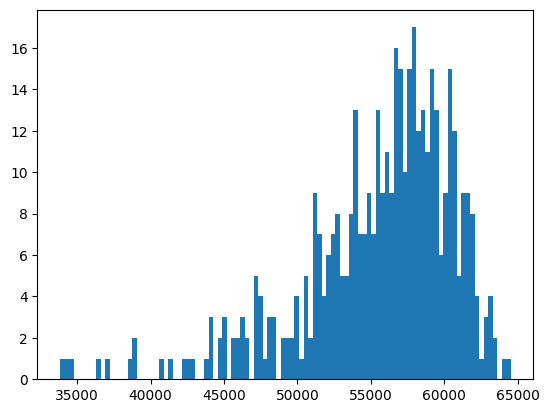

In [32]:
# histogram of 100 bins of row sums and distribution counts

df_sum = np.log2(exp_cts+1).sum(axis=1)
plt.hist(df_sum, bins=100)

In [33]:
# from the above histogram we decide to remove rows with sum <34200 or >36000 and see the shape of dataframe

print(exp_cts.shape)
exp_cts2 = exp_cts.loc[df_sum>42000]
print(exp_cts2.shape)
#exp_cts3 = exp_cts2.loc[df_sum<65000]
#print(exp_cts3.shape)

(435, 19517)
(425, 19517)


In [34]:
meta2 = meta2.set_index("File ID")

In [35]:
meta3 = meta2.loc[exp_cts2.index]
meta3.shape

(425, 11)

In [36]:
no_recur = meta2[meta2["DFS_STATUS"]=="0:DiseaseFree"]
recur = meta2[meta2["DFS_STATUS"]=="1:Recurred/Progressed"]

print(no_recur.shape)
print(recur.shape)

(309, 11)
(126, 11)


In [37]:
no_recur1 = meta3[meta3["DFS_STATUS"]=="0:DiseaseFree"]
recur1 = meta3[meta3["DFS_STATUS"]=="1:Recurred/Progressed"]

print(no_recur1.shape)
print(recur1.shape)

(303, 11)
(122, 11)


In [111]:
var_df = pd.DataFrame(np.var(exp_cts2))
var_df.columns=["var"]
var_df = var_df.sort_values("var")
var_df.reset_index(inplace=True)
thshold = int(0.30*len(var_df["var"]))
#var_df["var"][var_df = pd.DataFrame(np.var(exp_cts3))
varmore30 = var_df.iloc[thshold:len(var_df),:]
varmore30

,gene_name,var
5855,CFAP69,3.180710e+00
5856,TWIST2,3.181026e+00
5857,SNAI3,3.181273e+00
5858,ZFHX4,3.184834e+00
5859,SWSAP1,3.185950e+00
...,...,...
19512,MT-ND3,9.744543e+07
19513,MT-CO2,1.910801e+08
19514,MT-ND4,2.451410e+08
19515,MT-CO1,2.749350e+08


In [112]:
exp_cts3 = exp_cts2.iloc[:,varmore30.index]
print(exp_cts3.shape)
exp_cts3.head()

(425, 13662)


gene_name,GFER,SYNGR3,PKMYT1,WFIKKN1,WDR24,FBXL16,CHTF18,GNG13,MACF1,SMARCA4,...,ELOA3D,PDCD6-AHRR,ELOA3,AC013477.1,AC020765.6,AC010980.1,AC004233.4,AC008763.4,AL391628.1,AP006621.6
fc63bae4-fdfb-4990-9902-3e0fb51ec092,4.0635,0.2552,0.9678,0.6906,6.6452,31.4692,1.2043,0.0000,19.6953,14.0503,...,0.0,0.0000,0.0,0.0000,0.0000,0.4218,0.0000,0.0,0.0000,0.2865
01851b83-f8c4-4108-99c9-248fe29e39e9,8.7977,2.5558,0.1710,2.1155,9.9414,30.3000,1.3133,0.0576,31.3220,35.5923,...,0.0,0.0000,0.0,0.0096,0.0000,2.2937,0.0780,0.0,0.0059,0.2025
6d0df9bf-69d6-447f-b2d9-76391e95d61d,7.9276,0.1787,3.5366,2.0017,11.0983,30.1765,8.4693,0.0616,23.6628,20.2441,...,0.0,0.0103,0.0,0.0309,0.0311,0.1022,0.0834,0.0,0.0631,0.6499
1c5ca894-35e2-40f0-9d1a-38d25f6d6d78,6.8725,0.2574,0.7698,1.1431,13.4174,9.8071,2.7367,0.0423,15.7811,22.7767,...,0.0,0.0000,0.0,0.0141,0.0321,0.2946,0.0000,0.0,0.0433,0.7680
62482815-63b6-4df9-8698-44a2d5cdafaf,5.4772,0.2995,0.6067,1.1228,6.1813,27.0321,2.9886,0.0000,7.3498,12.4126,...,0.0,0.0000,0.0,0.0056,0.0084,0.1327,0.0451,0.0,0.0102,0.6834


In [113]:
pca = PCA()
pca.fit_transform(exp_cts3)
pca

PCA()

10  components explain around 95% of the variance. From 17571 genes to  10


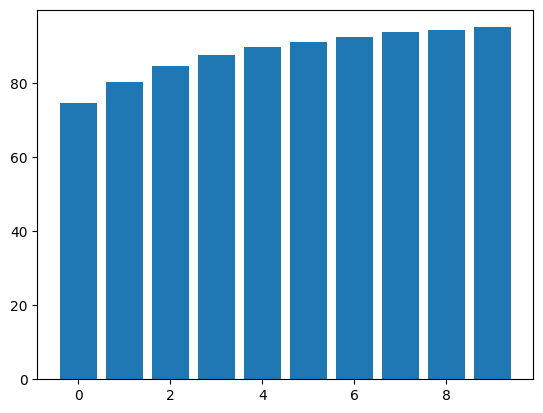

In [114]:
#explained_variance = np.var(pca, axis=0)
#explained_variance_ratio = explained_variance / np.sum(explained_variance)

total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " components explain around 95% of the variance. From 17571 genes to ", k)

pca = PCA(n_components=k)
exp_cts3.pca = pca.fit(exp_cts3)
exp_cts3_pca = pca.transform(exp_cts3)
#X_test_pca = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [115]:
X = np.log2(exp_cts3+1)
y = meta3["DFS_STATUS"]
y = y.replace({'0:DiseaseFree':0,'1:Recurred/Progressed':1})
labels = ['0:DiseaseFree', '1:Recurred/Progressed']
#y.replace(to_replace=['Solid Tissue Normal', 'Primary Tumor'], value=[0,1],inplace=True)
y.value_counts()

DFS_STATUS
0    303
1    122
Name: count, dtype: int64

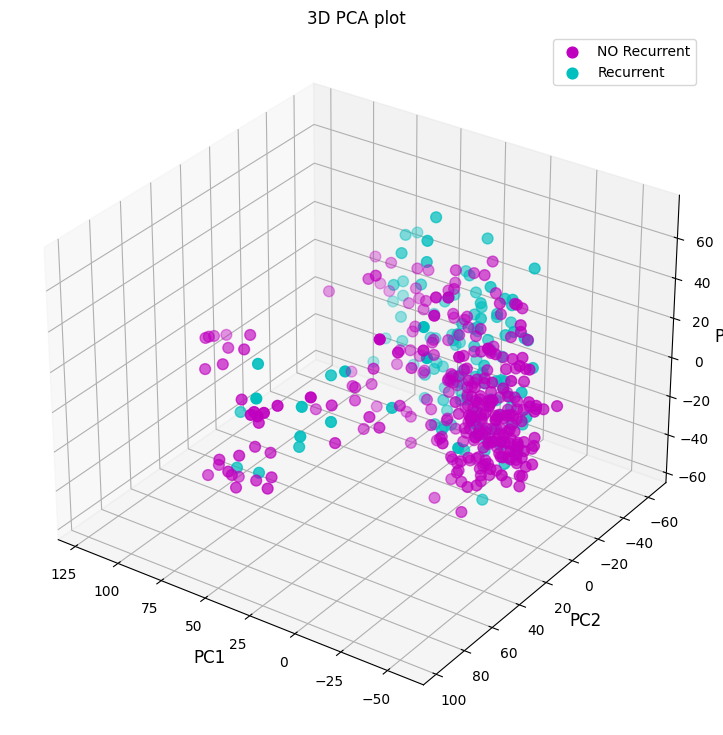

In [116]:
pca3 = PCA(n_components=3).fit(X)
X_reduced = pca3.transform(X)
Xax = X_reduced[:,0]
Yax = X_reduced[:,1]
Zax = X_reduced[:,2]

cdict = {0:'m',1:'c'}
label = {0:'NO Recurrent',1:'Recurrent'}

fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, 
                     projection='3d')
 
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], 
            Yax[ix], 
            Zax[ix], 
            c=cdict[l], 
            s=60,
           label=label[l])
 
ax.set_xlabel("PC1", 
              fontsize=12)
ax.set_ylabel("PC2", 
              fontsize=12)
ax.set_zlabel("PC3", 
              fontsize=12)
 
ax.view_init(30, 125)
ax.legend()
plt.title("3D PCA plot")
plt.show()

In [98]:
#scaler = StandardScaler()
#X_sc = scaler.fit_transform(X)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(340, 13662)
(340,)
(85, 13662)
(85,)
DFS_STATUS
0    246
1     94
Name: count, dtype: int64
DFS_STATUS
0    57
1    28
Name: count, dtype: int64


GaussianNB
accuracy 0.62
f1 score 0.48
ROC AUC 0.6
PR AUC 0.39


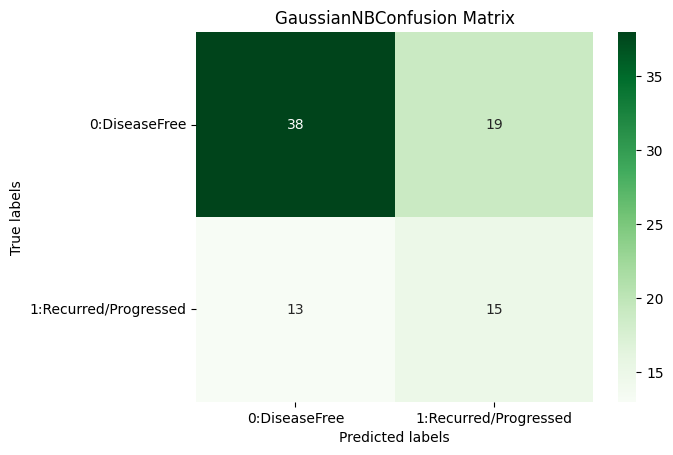

RandomForestClassifier
accuracy 0.71
f1 score 0.24
ROC AUC 0.56
PR AUC 0.4


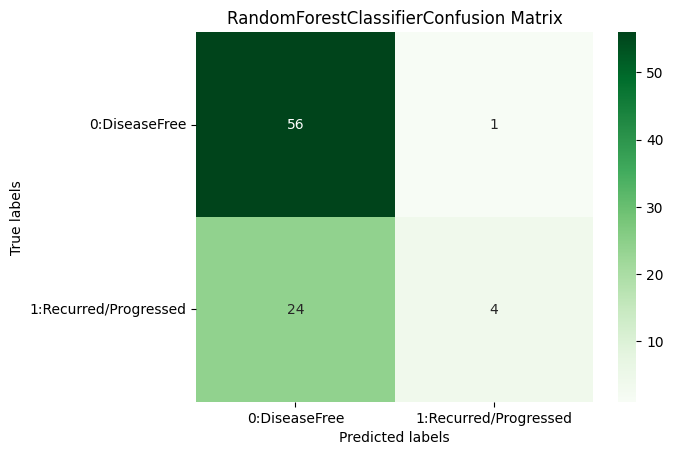

LogisticRegression
accuracy 0.81
f1 score 0.72
ROC AUC 0.8
PR AUC 0.61


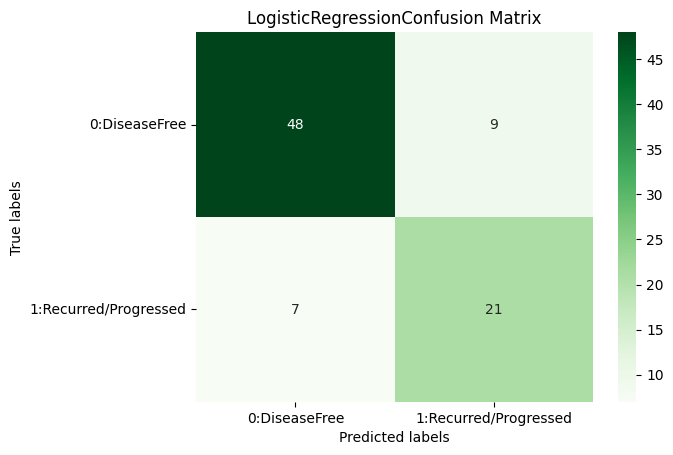

KNeighborsClassifier
accuracy 0.68
f1 score 0.07
ROC AUC 0.52
PR AUC 0.35


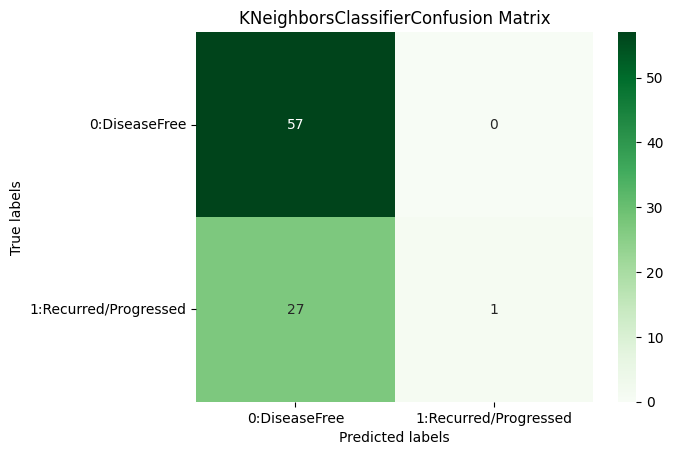

SVC
accuracy 0.67
f1 score 0.0
ROC AUC 0.5
PR AUC 0.33


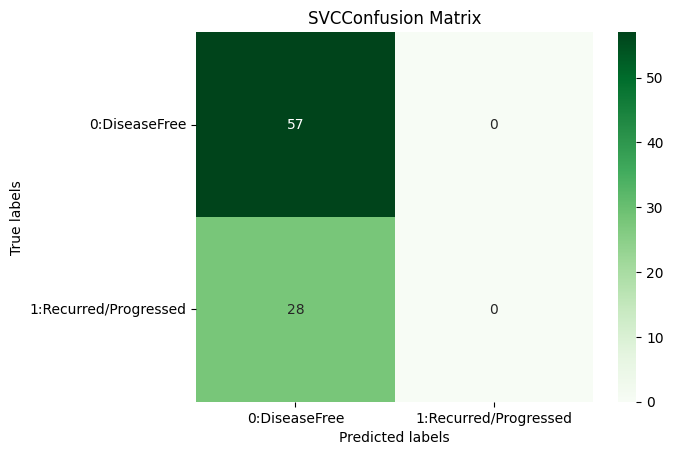

In [121]:
import seaborn as sns
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score, roc_auc_score, average_precision_score, matthews_corrcoef
import xgboost as xgb

# three model variables with middle parameters as possible
clf1 = GaussianNB()
clf2 = RandomForestClassifier(random_state=0, n_jobs=20, n_estimators=500, class_weight="balanced_subsample")
clf3 = LogisticRegression(max_iter=1000, C=0.001,class_weight="balanced")
clf4 = KNeighborsClassifier(n_neighbors=25)
clf5 = SVC(kernel='poly', degree=2)
#lf6 = xgb.XGBClassifier()

models =[clf1, clf2, clf3, clf4, clf5]

# use of 5 quality metrics to be used in k fold cross validation
scoring = {'acc' : make_scorer(accuracy_score),
           'f1' : make_scorer(f1_score), 
           'roc_auc' : make_scorer(roc_auc_score),
           'PR_auc' : make_scorer(average_precision_score),
           'matcf': make_scorer(matthews_corrcoef)}

# loop through the three models and fit all X, y and evaluate the model using 5 kfold cross validation
# and store each type of score range in a list then store total scores for each model in a dictionary
score = []
for clf in models:
    # Fine-tune the hyperparameters
    clf.fit(X_train, y_train)

    # Make predictions using the optimised parameters
    clf_pred = clf.predict(X_test)

    print(clf.__class__.__name__)
    print("accuracy", round(accuracy_score(y_test, clf_pred), 2))
    print("f1 score", round(f1_score(y_test, clf_pred), 2))
    print("ROC AUC", round(roc_auc_score(y_test, clf_pred), 2))
    print("PR AUC", round(average_precision_score(y_test, clf_pred), 2))
    
    score.append(round(average_precision_score(y_test, clf_pred), 2))
    cm = confusion_matrix(y_test, clf_pred)

    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Greens') 

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels') 
    ax.set_title(str(clf.__class__.__name__) + 'Confusion Matrix') 
    ax.xaxis.set_ticklabels(labels) 
    ax.yaxis.set_ticklabels(labels, rotation=360);
    plt.show()
    

In [122]:
# initiation of the model with the best score

clf = LogisticRegression(max_iter=1000, C=0.001,class_weight="balanced")

# fit the model on the training data
clf.fit(X, y)


LogisticRegression(C=0.001, class_weight='balanced', max_iter=1000)

In [123]:
importance = pd.DataFrame(clf.coef_)
#cols = list(X.columns)
importance.columns = X.columns
importance.index = ["gene"]

In [124]:
sort = importance.T.sort_values(by=["gene"], ascending=False)
sort.iloc[:50,]

,gene
gene_name,
FABP7,0.028637
SAA1,0.024058
APOD,0.023263
NDNF,0.021886
CKMT2,0.021560
BEX1,0.020343
CXCL13,0.018486
L1CAM,0.017640
UGT1A9,0.017444


In [125]:
import_genes = sort.iloc[:20,]

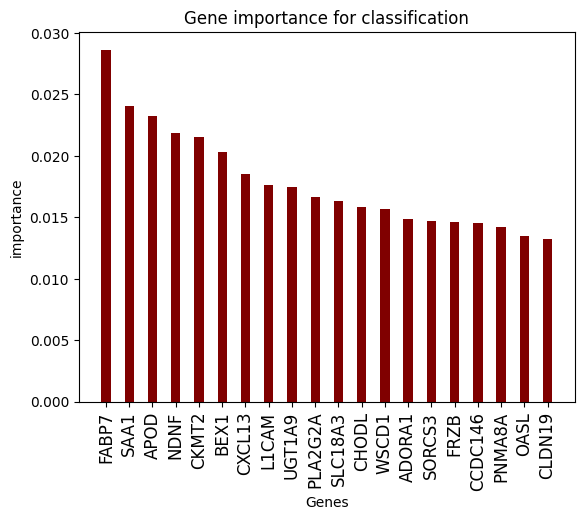

In [126]:
plt.bar(import_genes.index, import_genes["gene"], color ='maroon',
        width = 0.4)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel("Genes")
plt.ylabel("importance")
plt.title("Gene importance for classification")
plt.show()

In [127]:
exp_total = pd.concat([X, meta3["DFS_STATUS"]], axis=1)
exp_total.head()

,GFER,SYNGR3,PKMYT1,WFIKKN1,WDR24,FBXL16,CHTF18,GNG13,MACF1,SMARCA4,...,PDCD6-AHRR,ELOA3,AC013477.1,AC020765.6,AC010980.1,AC004233.4,AC008763.4,AL391628.1,AP006621.6,DFS_STATUS
fc63bae4-fdfb-4990-9902-3e0fb51ec092,2.340135,0.327917,0.976584,0.757535,2.934554,5.021000,1.140321,0.000000,4.371231,3.911720,...,0.000000,0.0,0.000000,0.000000,0.507719,0.000000,0.0,0.000000,0.363451,0:DiseaseFree
01851b83-f8c4-4108-99c9-248fe29e39e9,3.292443,1.830174,0.227741,1.639464,3.451725,4.968091,1.209952,0.080794,5.014445,5.193468,...,0.000000,0.0,0.013784,0.000000,1.719709,0.108357,0.0,0.008487,0.266037,0:DiseaseFree
6d0df9bf-69d6-447f-b2d9-76391e95d61d,3.158272,0.237197,2.181611,1.585780,3.596732,4.962387,3.243258,0.086240,4.624265,4.408990,...,0.014784,0.0,0.043904,0.044184,0.140386,0.115566,0.0,0.088277,0.722379,0:DiseaseFree
1c5ca894-35e2-40f0-9d1a-38d25f6d6d78,2.976822,0.330444,0.823586,1.099699,3.849739,3.433908,1.901765,0.059771,4.068765,4.571477,...,0.000000,0.0,0.020200,0.045583,0.372506,0.000000,0.0,0.061154,0.822118,0:DiseaseFree
62482815-63b6-4df9-8698-44a2d5cdafaf,2.695370,0.377957,0.684101,1.085968,2.844245,4.809008,1.995882,0.000000,3.061742,3.745517,...,0.000000,0.0,0.008057,0.012068,0.179766,0.063641,0.0,0.014641,0.751378,0:DiseaseFree


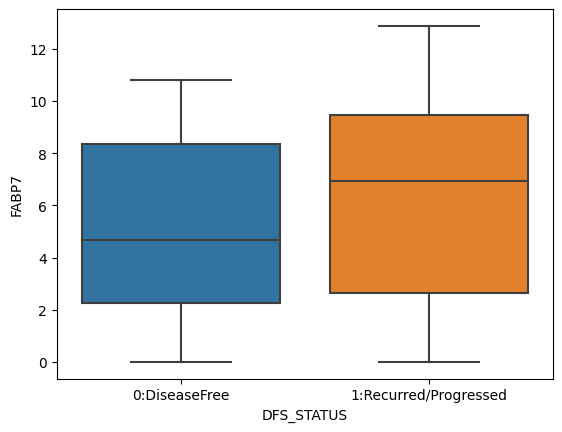

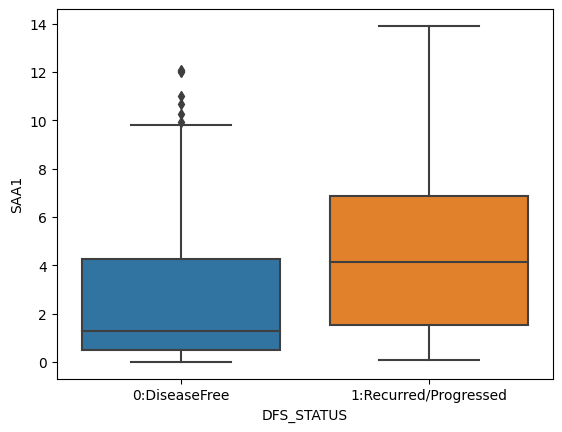

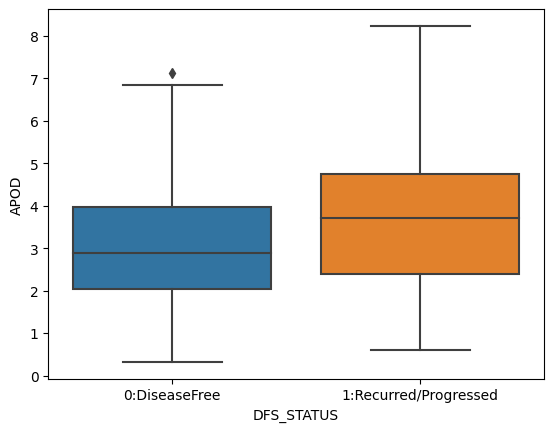

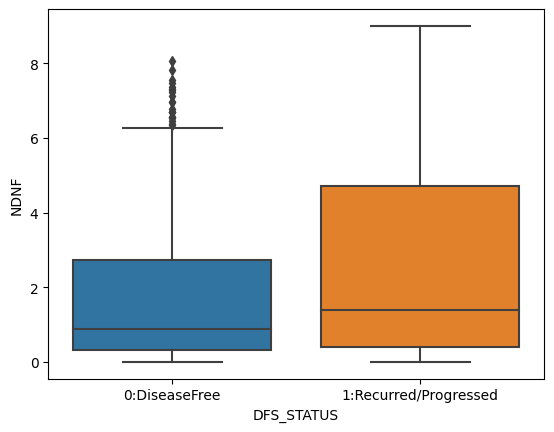

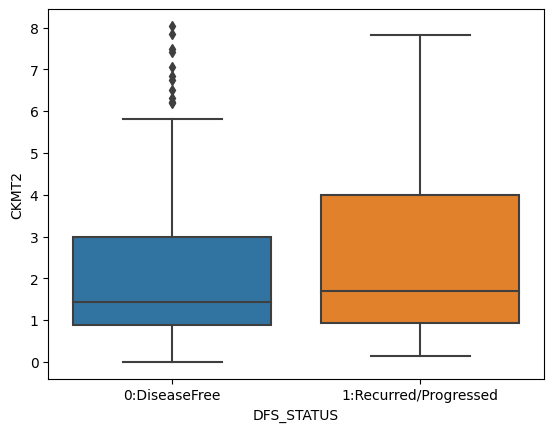

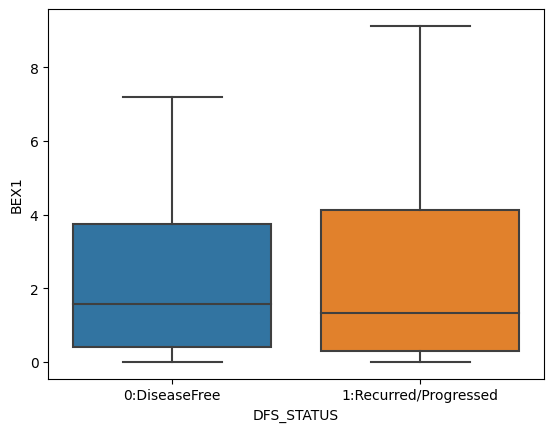

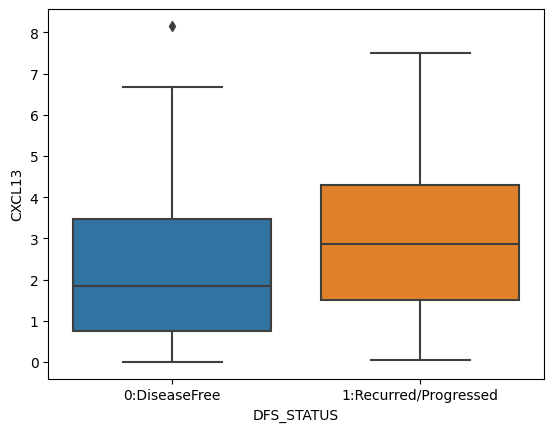

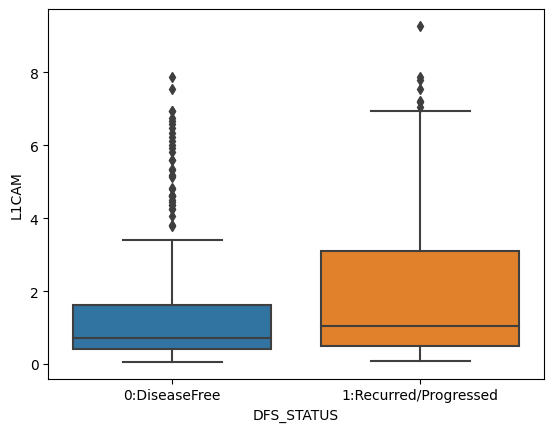

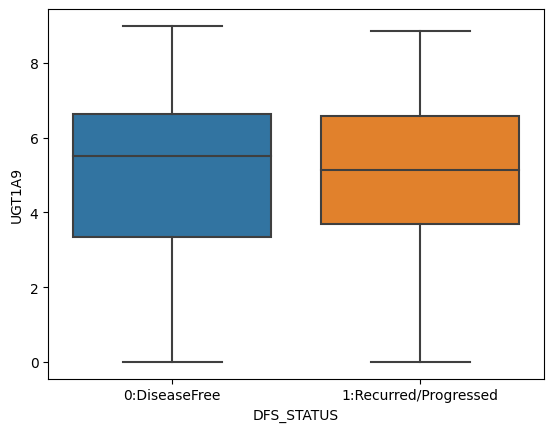

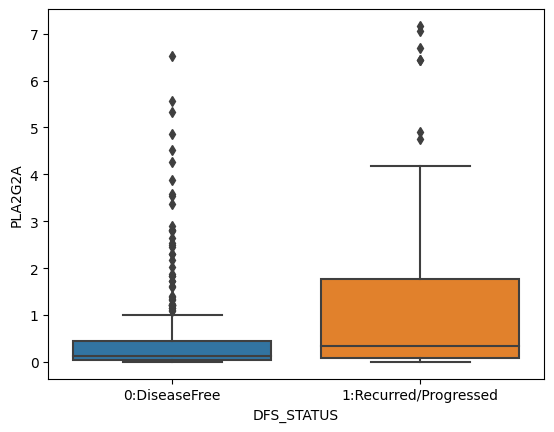

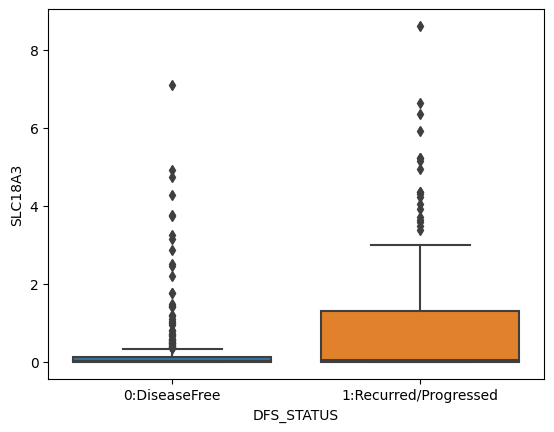

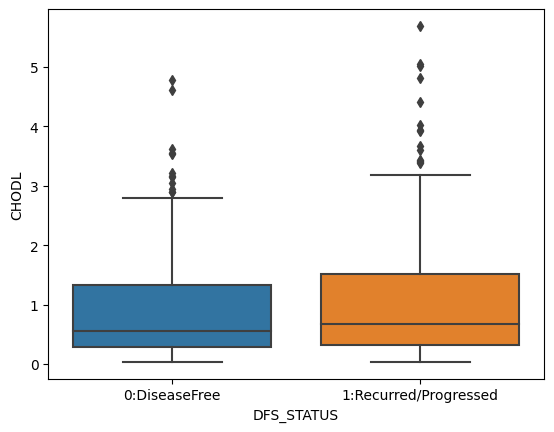

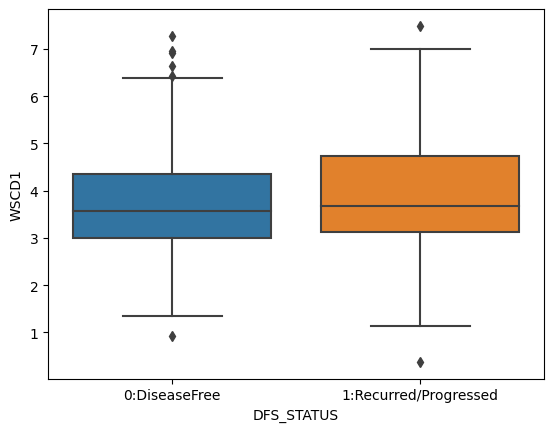

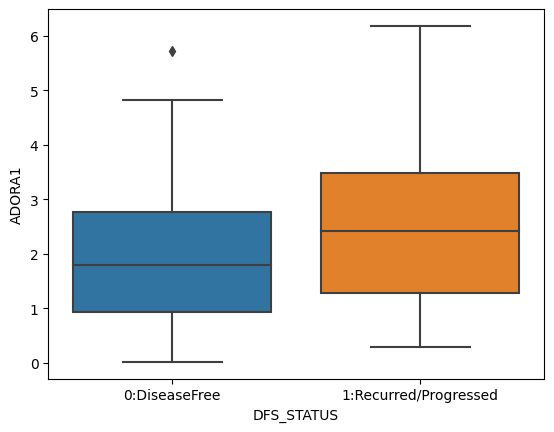

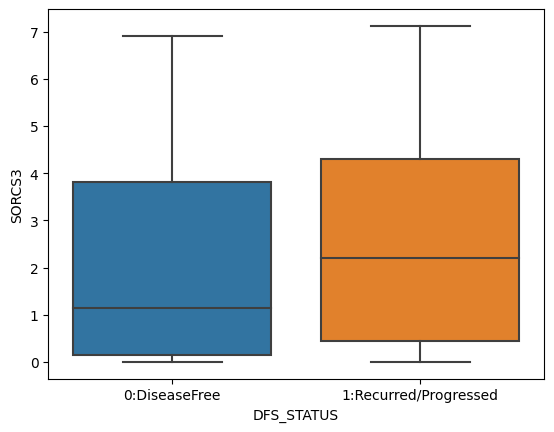

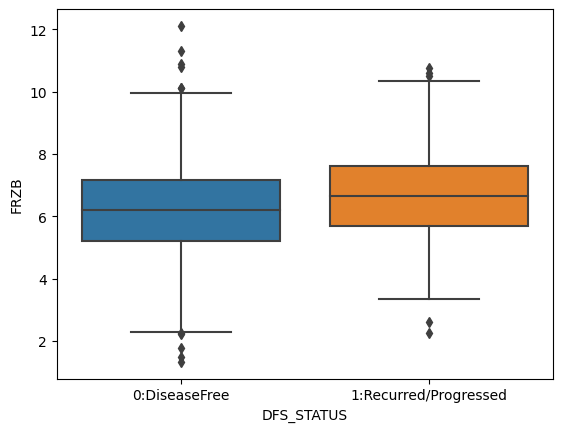

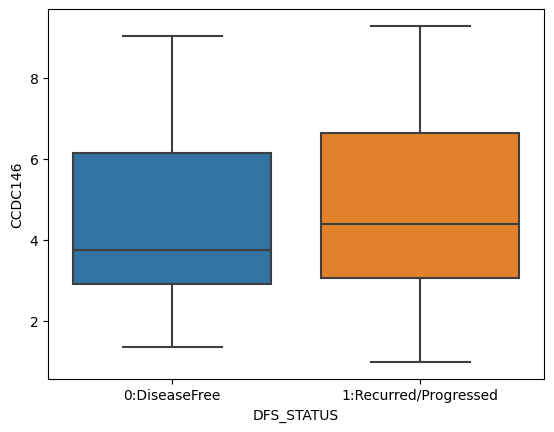

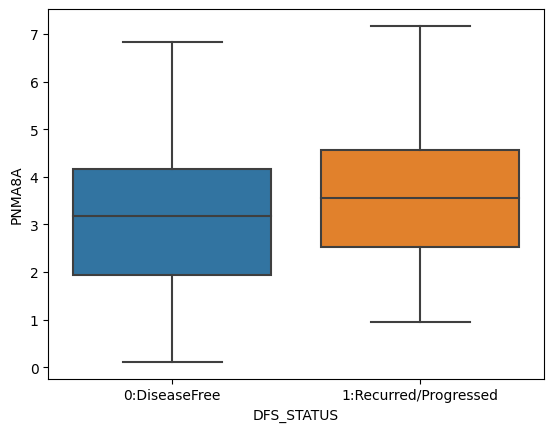

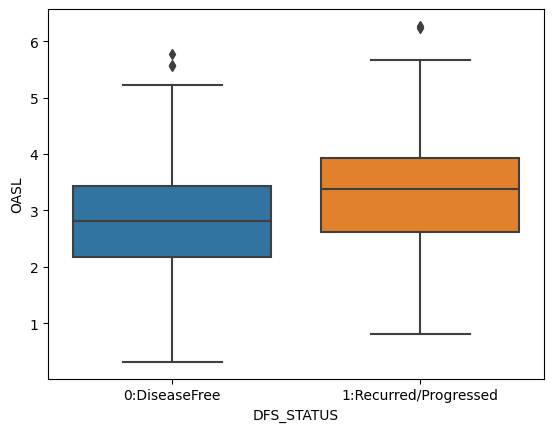

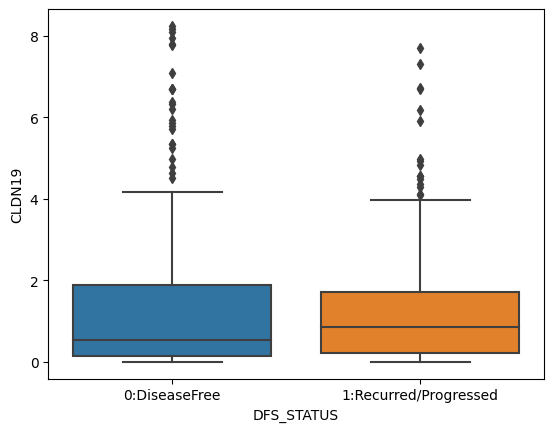

In [128]:
for gene in import_genes.index:
    sns.boxplot(data=exp_total, x='DFS_STATUS', y=gene)
    plt.show()